# US Births Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy.stats import skew
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor

## Project Proposal/EDA

In [2]:
#get current working directory in order to retrieve the file
print("Current working directory:", os.getcwd())
births = pd.read_csv('us_births_2016_2021.csv')

Current working directory: C:\Users\taylo\anaconda_projects\5c92882d-69b4-46e8-8c13-7619d9ce340d


In [3]:
#Data Exploration and Cleaning
births.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


In [4]:
births.tail()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
5491,Wyoming,WY,2021,M,"Associate degree (AA, AS)",5,401,29.2,3261.1
5492,Wyoming,WY,2021,M,"Bachelor's degree (BA, AB, BS)",6,657,30.7,3286.0
5493,Wyoming,WY,2021,M,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,261,33.0,3249.3
5494,Wyoming,WY,2021,M,"Doctorate (PhD, EdD) or Professional Degree (M...",8,72,33.3,3262.0
5495,Wyoming,WY,2021,M,Unknown or Not Stated,-9,41,29.2,3177.5


In [5]:
births.describe()

,Year,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
count,5496.000000,5496.000000,5496.000000,5496.000000,5496.000000
mean,2018.500728,3.026201,4115.443959,29.552274,3250.887627
std,1.707554,4.733406,6687.036797,2.779735,114.456090
min,2016.000000,-9.000000,10.000000,23.100000,2451.900000
25%,2017.000000,2.000000,559.000000,27.500000,3182.200000
50%,2019.000000,4.000000,1692.000000,29.600000,3256.000000
75%,2020.000000,6.000000,5140.000000,31.800000,3330.825000
max,2021.000000,8.000000,59967.000000,35.500000,3585.700000


In [6]:
#Drop Education Code -9 (correlates to "Unknown or Not Stated" Education Level)
births.drop(births[births['Education Level Code'] == -9].index, inplace=True) 

In [7]:
#Rerun descripton after cleaning the data (education level code will be more accurate now)
births.describe()

,Year,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
count,4896.000,4896.000000,4896.000000,4896.000000,4896.000000
mean,2018.500,4.500000,4555.975082,29.575878,3266.966033
std,1.708,2.291522,6927.155076,2.911373,99.214246
min,2016.000,1.000000,16.000000,23.100000,2946.100000
25%,2017.000,2.750000,826.750000,27.200000,3199.875000
50%,2018.500,4.500000,2201.000000,29.700000,3266.450000
75%,2020.000,6.250000,5663.500000,32.000000,3338.425000
max,2021.000,8.000000,59967.000000,35.500000,3585.700000


In [8]:
births.dtypes

State                             object
State Abbreviation                object
Year                               int64
Gender                            object
Education Level of Mother         object
Education Level Code               int64
Number of Births                   int64
Average Age of Mother (years)    float64
Average Birth Weight (g)         float64
dtype: object

In [9]:
# Convert grams to pounds and ounces since this is often how it is measured
def grams_to_lbs_oz(grams):
    total_pounds = grams / 453.59237
    pounds = int(total_pounds)
    ounces = (total_pounds - pounds) * 16
    return pounds, round(ounces, 2)

# Apply the conversion
births[['pounds', 'ounces']] = births['Average Birth Weight (g)'].apply(
    lambda g: pd.Series(grams_to_lbs_oz(g))
)

# Add formatted string column
births['lbs oz str'] = births.apply(
    lambda row: f"{row['pounds']} lbs {row['ounces']} oz", axis=1
)

print(births)

        State State Abbreviation  Year Gender  \
0     Alabama                 AL  2016      F   
1     Alabama                 AL  2016      F   
2     Alabama                 AL  2016      F   
3     Alabama                 AL  2016      F   
4     Alabama                 AL  2016      F   
...       ...                ...   ...    ...   
5490  Wyoming                 WY  2021      M   
5491  Wyoming                 WY  2021      M   
5492  Wyoming                 WY  2021      M   
5493  Wyoming                 WY  2021      M   
5494  Wyoming                 WY  2021      M   

                              Education Level of Mother  Education Level Code  \
0                                     8th grade or less                     1   
1                9th through 12th grade with no diploma                     2   
2                 High school graduate or GED completed                     3   
3                 Some college credit, but not a degree                     4   
4     

## Final Report & Analysis

In [10]:
#create a dataframe to plot the average number of births by education level
avg_births_by_education = (births.groupby('Education Level of Mother')['Number of Births'].mean().reset_index())
avg_births_by_education

,Education Level of Mother,Number of Births
0,8th grade or less,1158.251634
1,9th through 12th grade with no diploma,3409.120915
2,"Associate degree (AA, AS)",3051.797386
3,"Bachelor's degree (BA, AB, BS)",7603.241830
4,"Doctorate (PhD, EdD) or Professional Degree (M...",1025.661765
5,High school graduate or GED completed,9437.774510
6,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",3531.120915
7,"Some college credit, but not a degree",7230.831699


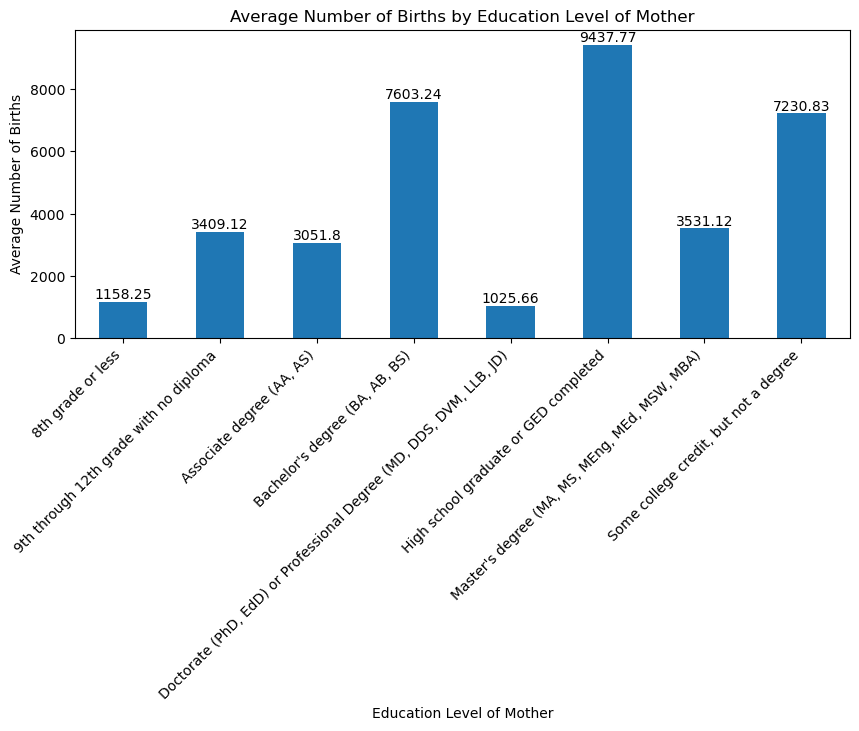

In [11]:
ax = avg_births_by_education.plot.bar(
    x='Education Level of Mother',
    y='Number of Births',
    title='Average Number of Births by Education Level of Mother',
    figsize=(10, 4),
    legend=False
)

plt.xlabel('Education Level of Mother')
plt.ylabel('Average Number of Births')
plt.xticks(rotation=45, ha='right')
ax.bar_label(ax.containers[0])
plt.savefig("avg_number_births_by_education_level_of_mother.png")
plt.show()

In [12]:
avg_births_by_education_code = (births.groupby('Education Level Code')['Number of Births'].mean().reset_index())
avg_births_by_education_code

,Education Level Code,Number of Births
0,1,1158.251634
1,2,3409.120915
2,3,9437.774510
3,4,7230.831699
4,5,3051.797386
5,6,7603.241830
6,7,3531.120915
7,8,1025.661765


In [13]:
std_dev_avg_births_by_education_code = avg_births_by_education_code['Number of Births'].std()
print(f"Standard deviation: {std_dev_avg_births_by_education_code}")

Standard deviation: 3137.525094813706


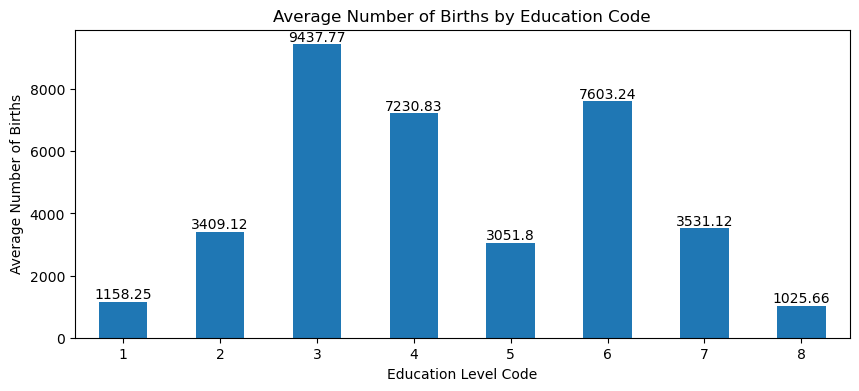

In [14]:
#create a graph with education code rather than education level so that the levels are in order
ax = avg_births_by_education_code.plot.bar(
    x='Education Level Code',
    y='Number of Births',
    title='Average Number of Births by Education Code',
    figsize=(10, 4),
    legend=False
)

plt.xlabel('Education Level Code')
plt.ylabel('Average Number of Births')
plt.xticks(rotation=360)
ax.bar_label(ax.containers[0])
plt.savefig("avg_number_births_by_education_code.png")
plt.show()

In [15]:
avg_weight_by_education = (births.groupby('Education Level of Mother')['Average Birth Weight (g)'].mean().reset_index())
avg_weight_by_education

,Education Level of Mother,Average Birth Weight (g)
0,8th grade or less,3249.857190
1,9th through 12th grade with no diploma,3158.514052
2,"Associate degree (AA, AS)",3289.469608
3,"Bachelor's degree (BA, AB, BS)",3334.916667
4,"Doctorate (PhD, EdD) or Professional Degree (M...",3303.866013
5,High school graduate or GED completed,3214.297549
6,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",3328.028758
7,"Some college credit, but not a degree",3256.778431


In [16]:
std_dev_avg_weight_by_education = avg_weight_by_education['Average Birth Weight (g)'].std()
print(f"Standard deviation: {std_dev_avg_weight_by_education}")

Standard deviation: 59.93599622873962


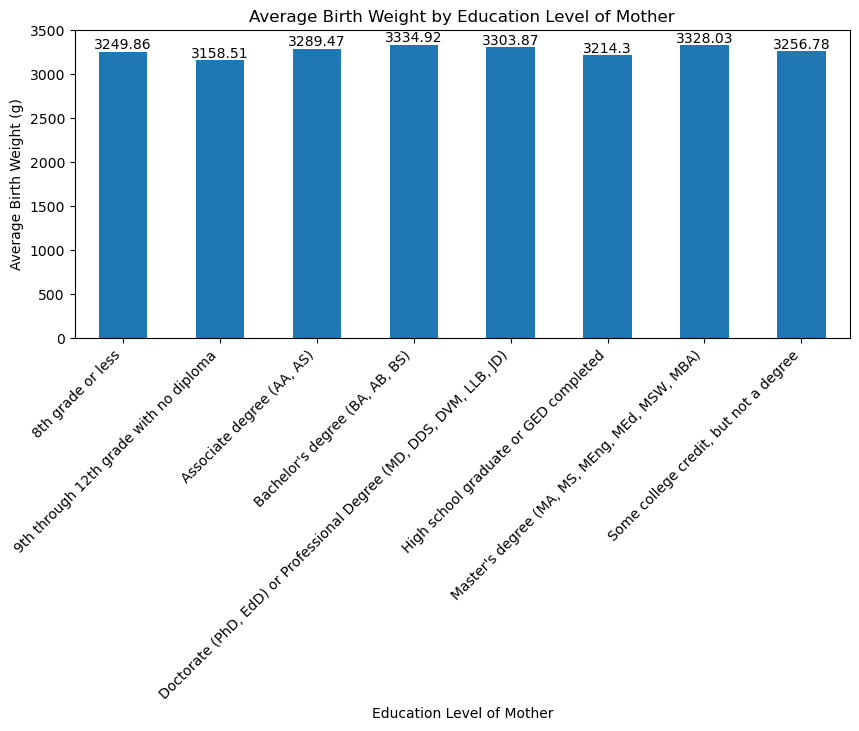

In [17]:
ax = avg_weight_by_education.plot.bar(
    x='Education Level of Mother',
    y='Average Birth Weight (g)',
    title='Average Birth Weight by Education Level of Mother',
    figsize=(10, 4),
    legend=False
)

plt.xlabel('Education Level of Mother')
plt.ylabel('Average Birth Weight (g)')
plt.xticks(rotation=45, ha='right')
ax.bar_label(ax.containers[0])
plt.savefig("avg_birth_weight_by_education_level_of_mother.png")
plt.show()

In [18]:
avg_weight_by_education_code = (births.groupby('Education Level Code')['Average Birth Weight (g)'].mean().reset_index())
avg_weight_by_education_code

,Education Level Code,Average Birth Weight (g)
0,1,3249.857190
1,2,3158.514052
2,3,3214.297549
3,4,3256.778431
4,5,3289.469608
5,6,3334.916667
6,7,3328.028758
7,8,3303.866013


In [19]:
std_dev_avg_weight_by_education_code = avg_weight_by_education_code['Average Birth Weight (g)'].std()
print(f"Standard deviation: {std_dev_avg_weight_by_education_code}")

Standard deviation: 59.935996228739626


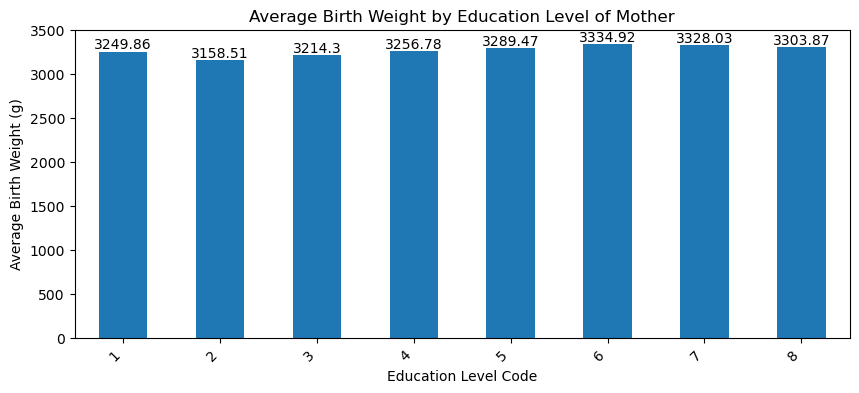

In [20]:
ax = avg_weight_by_education_code.plot.bar(
    x='Education Level Code',
    y='Average Birth Weight (g)',
    title='Average Birth Weight by Education Level of Mother',
    figsize=(10, 4),
    legend=False
)

plt.xlabel('Education Level Code')
plt.ylabel('Average Birth Weight (g)')
plt.xticks(rotation=45, ha='right')
ax.bar_label(ax.containers[0])
plt.savefig("avg_birth_weight_by_education_level_code.png")
plt.show()

In [21]:
avg_births_by_state = (births.groupby('State')['Number of Births'].mean().reset_index())
avg_births_by_state.sort_values('Number of Births', ascending=False).style.background_gradient(cmap='YlGnBu')

,State,Number of Births
4,California,26472.468750
43,Texas,23671.083333
32,New York,13787.843750
9,Florida,13570.916667
13,Illinois,8757.260417
38,Pennsylvania,8370.197917
35,Ohio,8342.447917
10,Georgia,7857.833333
33,North Carolina,7434.302083
22,Michigan,6725.010417


In [22]:
std_dev_avg_births_by_state = avg_births_by_state['Number of Births'].std()
print(f"Standard deviation: {std_dev_avg_births_by_state}")

Standard deviation: 5212.458773492658


In [23]:
avg_weight_by_state = (births.groupby('State')['Average Birth Weight (g)'].mean().reset_index())
avg_weight_by_state.sort_values('Average Birth Weight (g)', ascending=False).style.background_gradient(cmap='YlGnBu')

,State,Average Birth Weight (g)
1,Alaska,3371.808333
15,Iowa,3338.179167
23,Minnesota,3333.087500
47,Washington,3329.491667
19,Maine,3328.391667
45,Vermont,3327.867708
34,North Dakota,3327.679167
29,New Hampshire,3327.639583
37,Oregon,3326.837500
41,South Dakota,3319.935417


In [24]:
std_dev_avg_weight_by_state = avg_weight_by_state['Average Birth Weight (g)'].std()
print(f"Standard deviation: {std_dev_avg_weight_by_state}")

Standard deviation: 46.91760036818765


In [25]:
avg_births_by_year = (births.groupby('Year')['Number of Births'].mean().reset_index())
avg_births_by_year

,Year,Number of Births
0,2016,4772.519608
1,2017,4664.143382
2,2018,4586.672794
3,2019,4526.241422
4,2020,4365.090686
5,2021,4421.182598


In [26]:
std_dev_avg_births_by_year = avg_births_by_year['Number of Births'].std()
print(f"Standard deviation: {std_dev_avg_births_by_year}")

Standard deviation: 151.6734777273754


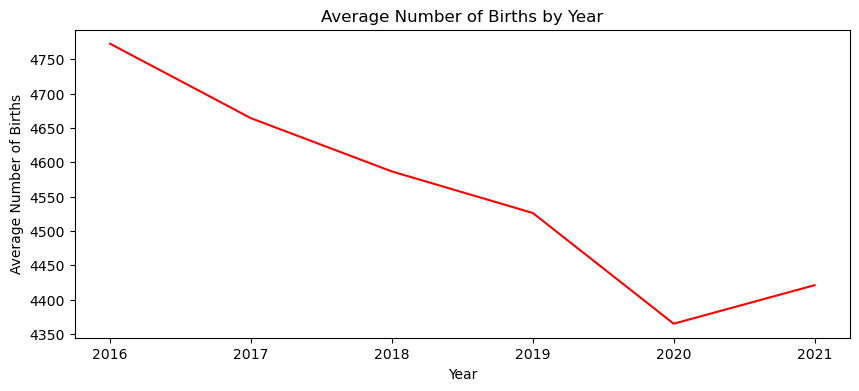

In [27]:
ax = avg_births_by_year.plot.line(
    x='Year',
    y='Number of Births',
    title='Average Number of Births by Year',
    color='red',
    figsize=(10, 4),
    legend=False
)

plt.xlabel('Year')
plt.ylabel('Average Number of Births')
plt.xticks(rotation=0)
plt.savefig("avg_number_births_by_year.png")
plt.show()

In [28]:
avg_weight_by_year = (births.groupby('Year')['Average Birth Weight (g)'].mean().reset_index())
avg_weight_by_year

,Year,Average Birth Weight (g)
0,2016,3277.733333
1,2017,3272.333946
2,2018,3270.556250
3,2019,3262.113358
4,2020,3262.689583
5,2021,3256.369730


In [29]:
std_dev_avg_weight_by_year = avg_weight_by_year['Average Birth Weight (g)'].std()
print(f"Standard deviation: {std_dev_avg_weight_by_year}")

Standard deviation: 7.896290423729585


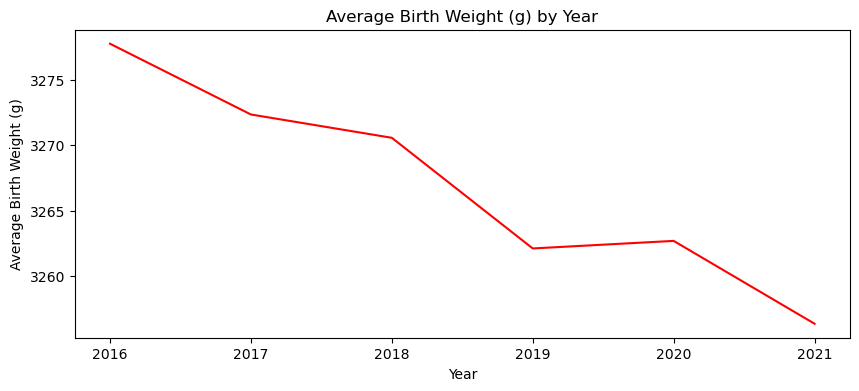

In [30]:
ax = avg_weight_by_year.plot.line(
    x='Year',
    y='Average Birth Weight (g)',
    title='Average Birth Weight (g) by Year',
    color='red',
    figsize=(10, 4),
    legend=False
)

plt.xlabel('Year')
plt.ylabel('Average Birth Weight (g)')
plt.xticks(rotation=0)
plt.savefig("avg_birth_weight_by_year.png")
plt.show()

In [31]:
avg_weight_by_age = (births.groupby('Average Age of Mother (years)')['Average Birth Weight (g)'].mean().reset_index())
avg_weight_by_age

,Average Age of Mother (years),Average Birth Weight (g)
0,23.1,3045.200000
1,23.2,3111.600000
2,23.3,3048.533333
3,23.4,3135.900000
4,23.5,3096.600000
...,...,...
120,35.1,3308.920000
121,35.2,3265.250000
122,35.3,3347.100000
123,35.4,3392.000000


In [32]:
std_dev_avg_weight_by_age = avg_weight_by_age['Average Birth Weight (g)'].std()
print(f"Standard deviation: {std_dev_avg_weight_by_age}")

Standard deviation: 72.8137847305255


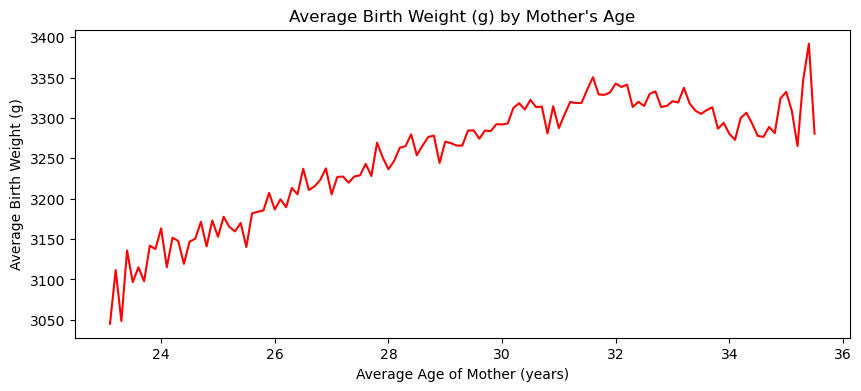

In [33]:
ax = avg_weight_by_age.plot.line(
    x='Average Age of Mother (years)',
    y='Average Birth Weight (g)',
    title="Average Birth Weight (g) by Mother's Age",
    color='red',
    figsize=(10, 4),
    legend=False
)

plt.xlabel('Average Age of Mother (years)')
plt.ylabel('Average Birth Weight (g)')
plt.xticks(rotation=0)
plt.savefig("avg_birth_weight_by_age.png")
plt.show()

In [34]:
avg_birth_count_by_age = (births.groupby('Average Age of Mother (years)')['Number of Births'].mean().reset_index())
avg_birth_count_by_age

,Average Age of Mother (years),Number of Births
0,23.1,221.000000
1,23.2,1742.500000
2,23.3,1330.333333
3,23.4,340.000000
4,23.5,886.000000
...,...,...
120,35.1,1899.400000
121,35.2,538.000000
122,35.3,521.000000
123,35.4,540.000000


In [35]:
std_dev_avg_birth_count_by_age = avg_birth_count_by_age['Number of Births'].std()
print(f"Standard deviation: {std_dev_avg_birth_count_by_age}")

Standard deviation: 2531.2433974511023


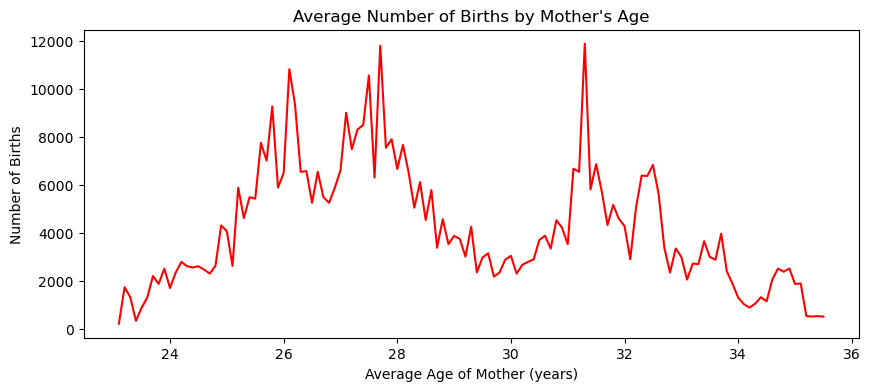

In [36]:
ax = avg_birth_count_by_age.plot.line(
    x='Average Age of Mother (years)',
    y='Number of Births',
    title="Average Number of Births by Mother's Age",
    color='red',
    figsize=(10, 4),
    legend=False
)

plt.xlabel('Average Age of Mother (years)')
plt.ylabel('Number of Births')
plt.xticks(rotation=0)
plt.savefig("avg_birth_count_by_age.png")
plt.show()

## Continue to Prep Data for Modeling

In [37]:
#create dummy variables for education level and state so that they can be used in the models as integers
births_encoded = pd.get_dummies(births, columns=['Education Level of Mother', 'State'], dtype='uint8') #forces int
births_encoded.head()

,State Abbreviation,Year,Gender,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g),pounds,ounces,lbs oz str,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,AL,2016,F,1,1052,27.8,3116.9,6.0,13.95,6.0 lbs 13.95 oz,...,0,0,0,0,0,0,0,0,0,0
1,AL,2016,F,2,3436,24.1,3040.0,6.0,11.23,6.0 lbs 11.23 oz,...,0,0,0,0,0,0,0,0,0,0
2,AL,2016,F,3,8777,25.4,3080.0,6.0,12.64,6.0 lbs 12.64 oz,...,0,0,0,0,0,0,0,0,0,0
3,AL,2016,F,4,6453,26.7,3121.9,6.0,14.12,6.0 lbs 14.12 oz,...,0,0,0,0,0,0,0,0,0,0
4,AL,2016,F,5,2227,28.9,3174.3,6.0,15.97,6.0 lbs 15.97 oz,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#only columns from dataframe that are integers that I want to use in the pairplot below
births_num_cols = ['Year', 'Education Level Code', 'Number of Births', 'Average Age of Mother (years)', 'Average Birth Weight (g)']

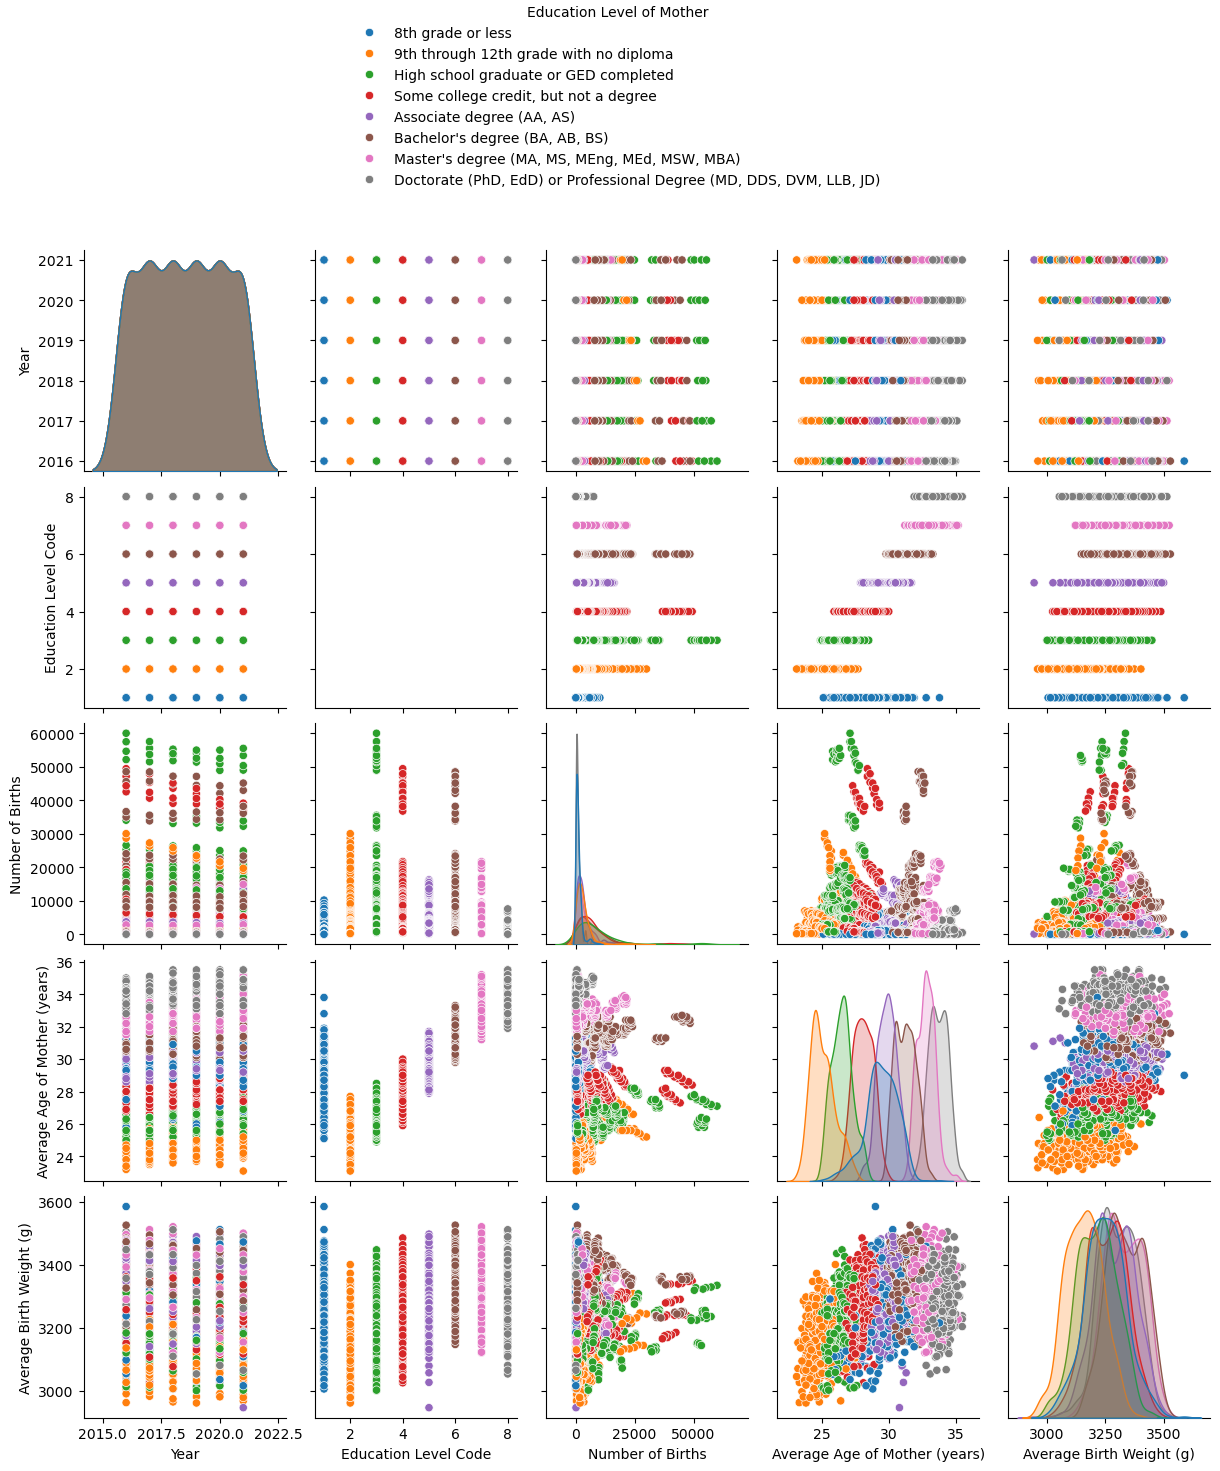

In [39]:
plot = sns.pairplot(births[births_num_cols + ['Education Level of Mother']],
            hue = 'Education Level of Mother')
#move legend to top
plot.legend.set_bbox_to_anchor((0.5, 1.1))
plot.savefig("pairplot.png", dpi=300)

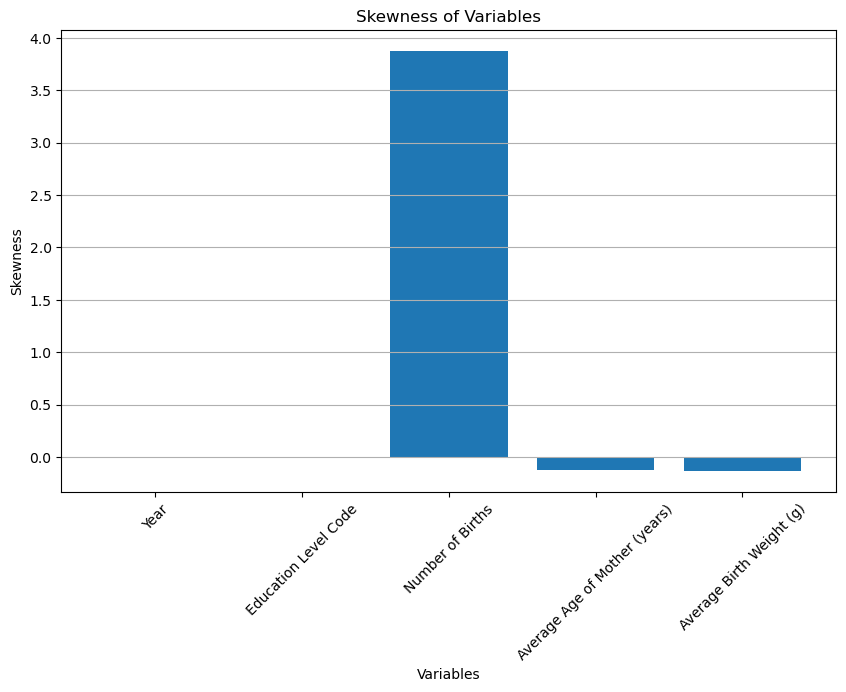

In [40]:
#Find and display skews
skewness_values = births[births_num_cols].apply(skew)
plt.figure(figsize=(10, 6))
plt.bar(skewness_values.index, skewness_values.values)
plt.xticks(rotation=45)
plt.xlabel('Variables')
plt.ylabel('Skewness')
plt.title('Skewness of Variables')
plt.grid(axis='y')
plt.savefig("skew.png")
plt.show()

In [41]:
births_num = births[births_num_cols]
births_num.corr()

,Year,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
Year,1.000000e+00,1.791968e-15,-0.019121,0.053204,-0.070924
Education Level Code,1.791968e-15,1.000000e+00,-0.039384,0.792772,0.445487
Number of Births,-1.912135e-02,-3.938428e-02,1.000000,-0.124405,-0.049801
Average Age of Mother (years),5.320448e-02,7.927719e-01,-0.124405,1.000000,0.516987
Average Birth Weight (g),-7.092394e-02,4.454869e-01,-0.049801,0.516987,1.000000


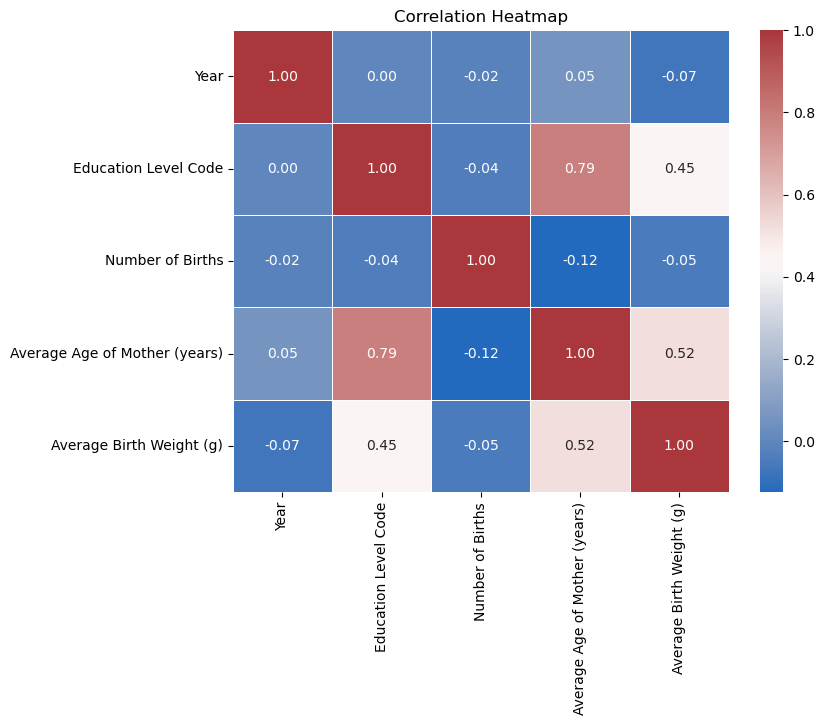

In [42]:
correlation_matrix = births_num.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='vlag', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.savefig('heatmap.png')
plt.show()

In [43]:
#create a final dataframe for analysis, remove state abbreviation and pound/ounces columns because it is redundant data, 
#and remove gender because gender is random in nature 
births_final = births_encoded.drop(columns=['State Abbreviation','Gender','pounds','ounces','lbs oz str'])
births_final.head()

,Year,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g),Education Level of Mother_8th grade or less,Education Level of Mother_9th through 12th grade with no diploma,"Education Level of Mother_Associate degree (AA, AS)","Education Level of Mother_Bachelor's degree (BA, AB, BS)","Education Level of Mother_Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)",...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,2016,1,1052,27.8,3116.9,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016,2,3436,24.1,3040.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,3,8777,25.4,3080.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016,4,6453,26.7,3121.9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016,5,2227,28.9,3174.3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Feature Engineering - Correlation

In [44]:
#now looking at correlation for all values with the dummy variables
corrs = abs(births_final.corrwith(births_final["Number of Births"])) #target variable is number of births
# Sort the correlations in descending order and show only correlation above .10
sorted_correlations = corrs.sort_values(ascending=False)
sorted_correlations[sorted_correlations > 0.10]

Number of Births                                                                                 1.000000
State_California                                                                                 0.447482
State_Texas                                                                                      0.390284
Education Level of Mother_High school graduate or GED completed                                  0.266391
Education Level of Mother_Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)    0.192643
State_New York                                                                                   0.188492
Education Level of Mother_8th grade or less                                                      0.185408
State_Florida                                                                                    0.184063
Education Level of Mother_Bachelor's degree (BA, AB, BS)                                         0.166284
Education Level of Mother_Some college credit,

### Feature Engineering - K-Best Method

In [45]:
x = births_final.drop('Number of Births', axis=1)  #independent column
y = births_final['Number of Births']    #target column 
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func= f_regression, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score')  #display 10 best features

,Features,Score
16,State_California,1225.336508
55,State_Texas,879.418152
9,Education Level of Mother_High school graduate...,373.828441
8,"Education Level of Mother_Doctorate (PhD, EdD)...",188.623272
44,State_New York,180.286457
4,Education Level of Mother_8th grade or less,174.225964
21,State_Florida,171.619768
7,Education Level of Mother_Bachelor's degree (B...,139.169265
11,"Education Level of Mother_Some college credit,...",106.536511
2,Average Age of Mother (years),76.933469


### Feature Engineering - P-Value

In [46]:
def run_linear_regression(df):
    x = births_final.drop('Number of Births', axis=1)
    y = births_final['Number of Births']
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    p_values = model.pvalues.drop('const')  # Exclude the p-value for the constant term
    return model, p_values
while True:
    model, p_values = run_linear_regression(births_final)
    if all(p_values < 0.05):
        break
    highest_p_value_variable = p_values.idxmax()
    births_final.drop(highest_p_value_variable, axis=1, inplace=True)
x_final = births_final.drop('Number of Births', axis=1)
x_final = sm.add_constant(x_final)
y_final = births_final['Number of Births']
final_model = sm.OLS(y_final, x_final).fit()
# Print the summary of the final model
final_model.summary()
#filtered out p values that aren't above .05 so the below features will all have some sort of importance to the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Number of Births   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     269.7
Date:                Sun, 22 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:51:45   Log-Likelihood:                -46986.
No. Observations:                4896   AIC:                         9.407e+04
Df Residuals:                    4845   BIC:                         9.440e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================================
                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                         -8793.4784   2310.787     -3.805      0.000   -1.33e+04   -4263.287
Education Level Code                                                                           5296.7542    237.462     22.306      0.000    4831.221    5762.287
Average Age of Mother (years)                                                                  -544.5023     87.998     -6.188      0.000    -717.019    -371.986
Education Level of Mother_8th grade or less                                                    1.905e+04   1036.800     18.372      0.000     1.7e+04    2.11e+04
Education Level of Mother_9th through 12th grade with no diploma                               1.364e+04    740.357     18.418      0.000    1.22e+04    1.51e+04
Education Level of Mother_Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD) -1.583e+04    541.960    -29.204      0.000   -1.69e+04   -1.48e+04
Education Level of Mother_High school graduate or GED completed                                1.514e+04    544.287     27.825      0.000    1.41e+04    1.62e+04
Education Level of Mother_Master's degree (MA, MS, MEng, MEd, MSW, MBA)                       -8524.0958    354.820    -24.024      0.000   -9219.704   -7828.488
Education Level of Mother_Some college credit, but not a degree                                8499.5991    356.414     23.848      0.000    7800.866    9198.332
State_Alaska                                                                                  -2257.1003    385.782     -5.851      0.000   -3013.407   -1500.793
State_Arizona                                                                                  2077.0662    385.501      5.388      0.000    1321.310    2832.822
State_Arkansas                                                                                -1216.6894    392.914     -3.097      0.002   -1986.980    -446.399
State_California                                                                               2.421e+04    403.740     59.957      0.000    2.34e+04     2.5e+04
State_Colorado                                                                                 1231.5374    388.679      3.169      0.002     469.550    1993.525
State_Delaware                                                                                -2179.0580    386.201     -5.642      0.000   -2936.188   -1421.928
State_District of Columbia                                                                    -1783.4799    399.730     -4.462      0.000   -2567.132    -999.828
State

### Linear Regression Model

In [47]:
# Train the model
x = sm.add_constant(x_final) #using the x values from the p-value model selection method above because we know these are the ones that are useful for building the model
y = births_final['Number of Births']
# Divide the data into testing and training
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state= 68) #maybe change random_state
RLR = LinearRegression().fit(xtrain, ytrain)
ytrainpred = RLR.predict(xtrain)
ytestpred = RLR.predict(xtest)

In [48]:
#generate a summary of training predictions
pd.DataFrame(list(zip(ytrain, ytrainpred)), columns=['ytrain','ytrainhat']).head()

,ytrain,ytrainhat
0,11412,9802.25
1,2385,5512.50
2,3516,4744.50
3,532,-820.00
4,6047,7738.75


In [49]:
#generate a summary of the test predicitions (unseen data by the model)
pd.DataFrame(list(zip(ytest, ytestpred)), columns=['ytest','ytesthat']).head()

,ytest,ytesthat
0,1482,3809.75
1,1181,3234.75
2,5513,5466.75
3,579,500.50
4,13217,11208.25


In [50]:
testr2 = metrics.r2_score(ytest, ytestpred)
trainr2 = metrics.r2_score(ytrain, ytrainpred)
print("R^2 train:",trainr2, "R^2 test:",testr2)
#train and test are pretty close so that is a good sign, better to have Test R2 to be a little more, updated random_state to get better results

R^2 train: 0.725799727019655 R^2 test: 0.7343480794386306


In [51]:
testMSE = metrics.mean_squared_error(ytest, ytestpred)
trainMSE = metrics.mean_squared_error(ytrain, ytrainpred)
print("MSE train:",trainMSE,"MSE test:", testMSE)
#the Mean Squared Error for both train and test are very close so that is another good sign we are not overfitting or underfitting

MSE train: 11415000.750680828 MSE test: 17685960.546823937


In [52]:
testRMSE = metrics.root_mean_squared_error(ytest, ytestpred)
trainRMSE = metrics.root_mean_squared_error(ytrain, ytrainpred)
print("RMSE train:",trainRMSE,"RMSE test:", testRMSE)

RMSE train: 3378.6092923984015 RMSE test: 4205.46793434737


### Random Forest Model

In [53]:
RF = RandomForestRegressor(n_estimators = 100, random_state = 1)
RFR = RF.fit(xtrain, ytrain)
RFRtrainpred = RFR.predict(xtrain)
RFRtestpred = RFR.predict(xtest)

In [54]:
RFRtrainmse = metrics.mean_squared_error(ytrain, RFRtrainpred)
RFRtestmse = metrics.mean_squared_error(ytest, RFRtestpred) 
RFRtrainr2 = metrics.r2_score(ytrain, RFRtrainpred)
RFRtestr2 = metrics.r2_score(ytest, RFRtestpred)
RFRtrainRMSE = metrics.root_mean_squared_error(ytrain, RFRtrainpred)
RFRtestRMSE = metrics.root_mean_squared_error(ytest, RFRtestpred)

In [55]:
print("R^2 train:", RFRtrainr2, "R^2 test:", RFRtestr2)

R^2 train: 0.9980184675758746 R^2 test: 0.9948674406440606


In [56]:
print("MSE train:", RFRtrainmse, "MSE test:", RFRtestmse)

MSE train: 82491.50835276875 MSE test: 341703.6928682952


In [57]:
print("RMSE train:", RFRtrainRMSE, "RMSE test:", RFRtestRMSE)

RMSE train: 287.2133498860538 RMSE test: 584.5542685399664


In [58]:
cv_mse_scores = cross_val_score(RF, xtrain, ytrain, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_mse_scores)

print("Cross-Validation MSE Scores:", - cv_mse_scores)
print("Average MSE from 5-Fold:", - cv_mse_scores.mean())

Cross-Validation MSE Scores: [427720.68660392 540409.0531791  266801.64745099 362498.56174652
 283294.81910825]
Average MSE from 5-Fold: 376144.95361775445


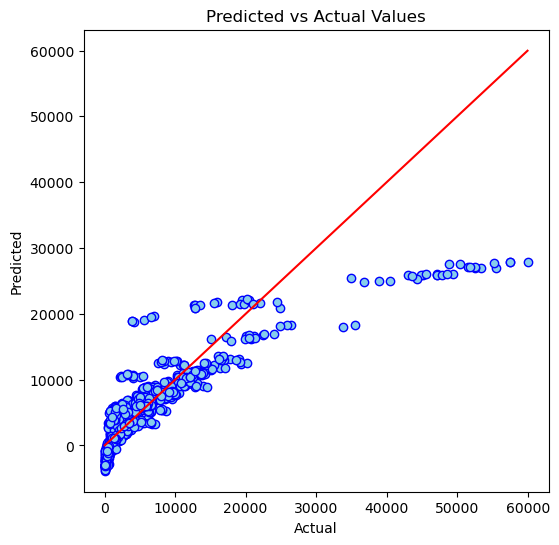

In [59]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(ytest, ytestpred, color='skyblue', edgecolors='blue')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red')  # Reference line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.savefig('Predicted_vs_actual.png')
plt.show()

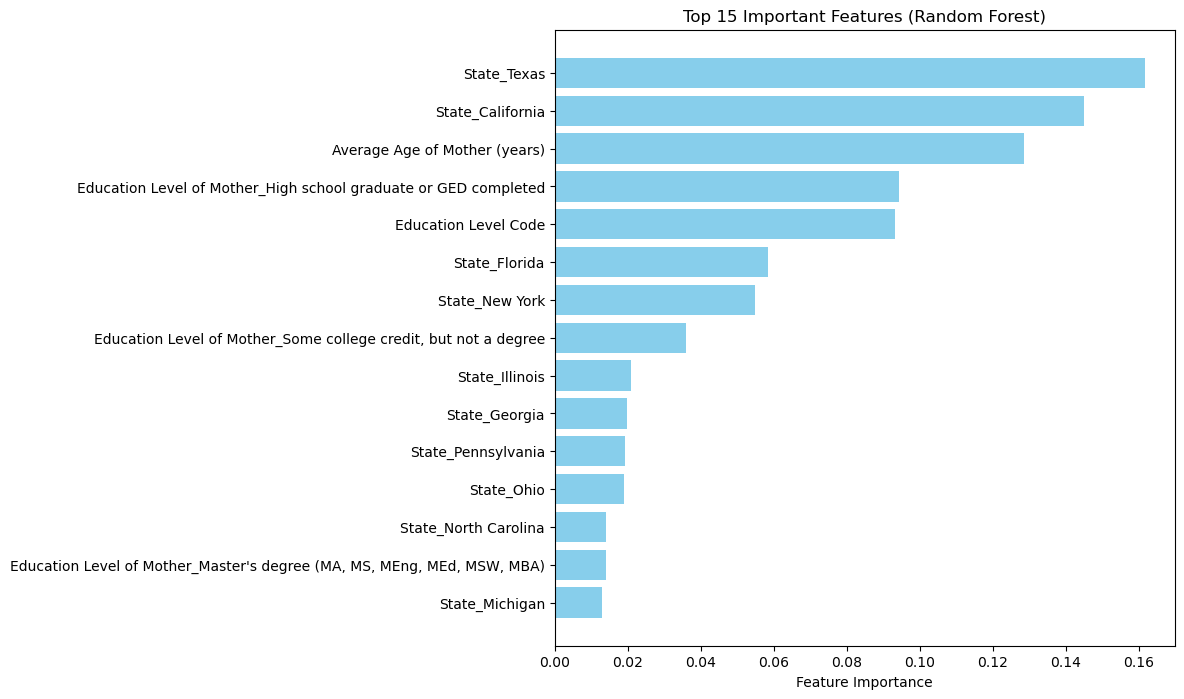

In [60]:
importances = RF.feature_importances_
feature_names = x.columns
indices = np.argsort(importances)[-15:]  #Top 15 features

plt.figure(figsize=(8,8))
plt.barh(range(len(indices)), importances[indices], color = 'skyblue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 15 Important Features (Random Forest)')
plt.savefig('top_features.png')
plt.show()

In [61]:
pip install shap

C:\Users\taylo\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


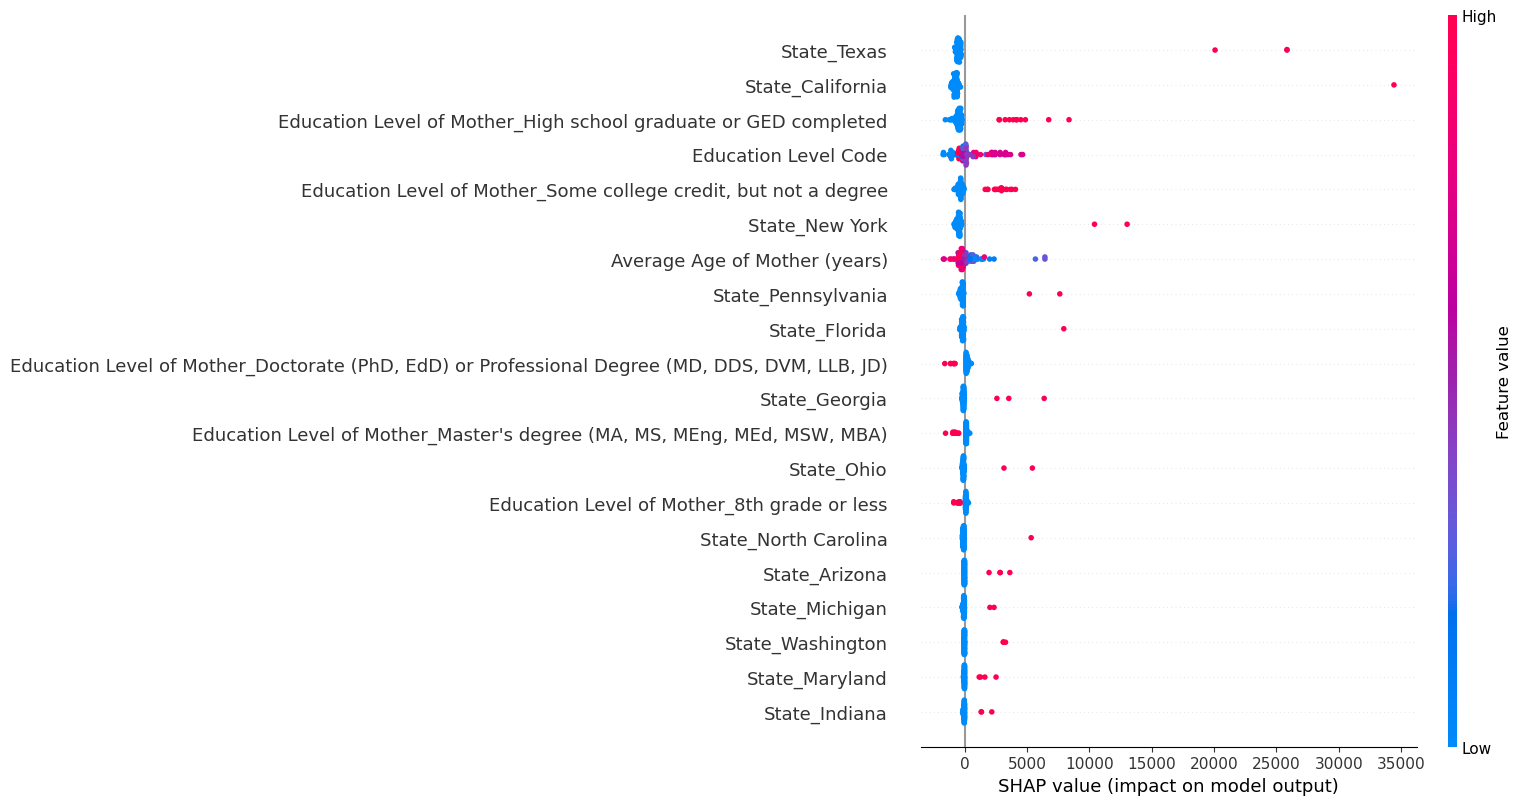

<Figure size 640x480 with 0 Axes>

In [62]:
import shap
#Take a small sample from the test set so it takes less time to run
x_sample = xtest.sample(100, random_state=42)

#Create SHAP explainer and calculate SHAP values
explainer = shap.Explainer(RF, xtrain)
shap_values = explainer(x_sample, check_additivity=False)

#plot
shap.summary_plot(shap_values, x_sample)
plt.savefig('shap_values.png', dpi=300)